In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

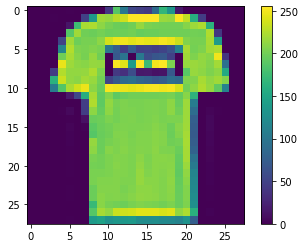

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images/255.
test_images = test_images/255.

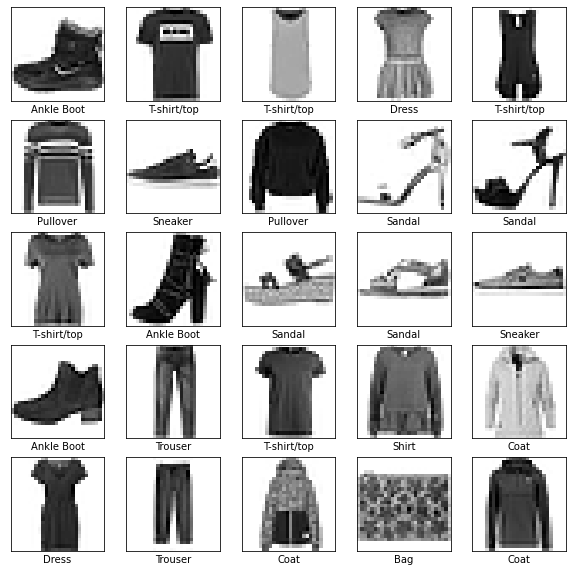

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap =plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [15]:
model.fit(train_images, train_labels, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1934 - accuracy: 0.9276 - val_loss: 0.1995 - val_accuracy: 0.9212
Epoch 2/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1874 - accuracy: 0.9299 - val_loss: 0.2197 - val_accuracy: 0.9177
Epoch 3/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1834 - accuracy: 0.9306 - val_loss: 0.2096 - val_accuracy: 0.9178
Epoch 4/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1783 - accuracy: 0.9324 - val_loss: 0.2158 - val_accuracy: 0.9205
Epoch 5/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1722 - accuracy: 0.9354 - val_loss: 0.2175 - val_accuracy: 0.9173
Epoch 6/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1696 - accuracy: 0.9362 - val_loss: 0.2431 - val_accuracy: 0.9127
Epoch 7/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1634 - accuracy: 0.9383 - val_loss: 0.2332 - val_ac

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 0s - loss: 0.4199 - accuracy: 0.8861

Test Accuracy: 0.8860999941825867


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
predictions[0]

array([1.3008894e-08, 2.2233401e-13, 8.1041365e-16, 3.7742297e-14,
       2.6988054e-12, 1.5247614e-03, 1.8446795e-10, 1.0818397e-04,
       7.9354379e-12, 9.9836701e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [25]:
test_labels[np.argmax(predictions[0])]

7

In [33]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img=true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)

In [34]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="blue")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

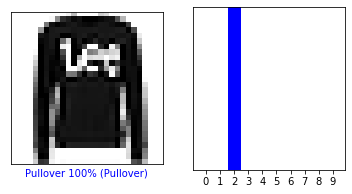

In [35]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

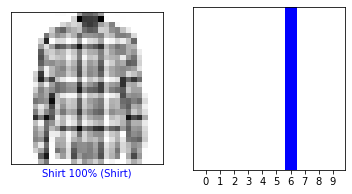

In [36]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

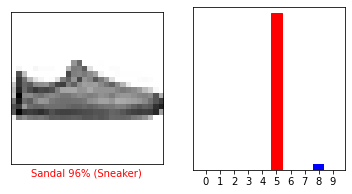

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

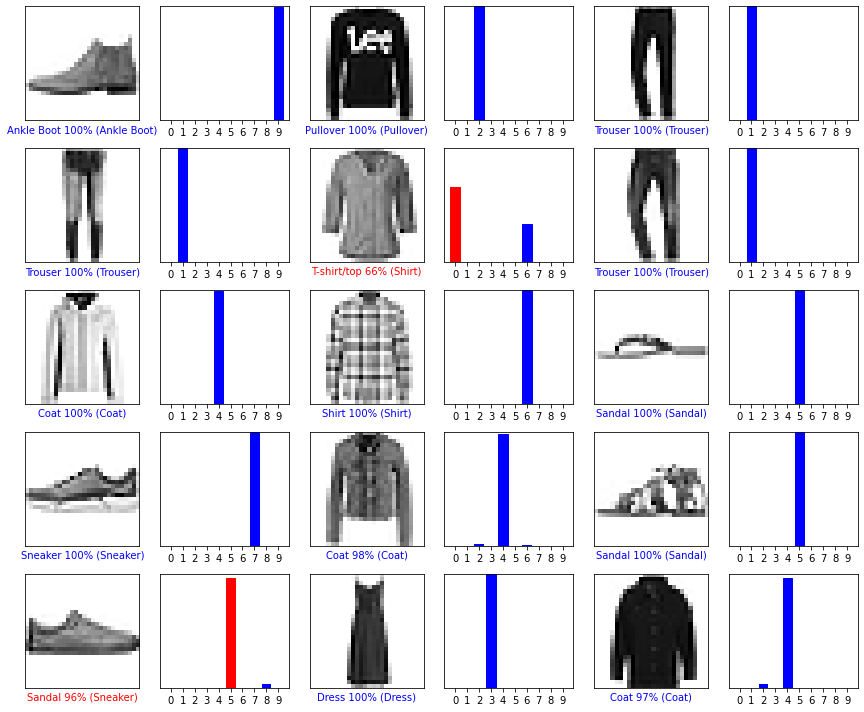

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()